# Analysis of a Property Dataset

The assignment will focus on pre-processing data using the Pandas library, followed by the creation of plots using matplotlib and seaborn libraries.

### Importing Libraries

Run the following cell to import packages and set plotting styling. 


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') 

### About the Dataset

Please refer to the `data/data-dictionary.pdf` file outlining details about the dataset each field (properties and their characteristics)

### Importing the Dataset

Use `.read_csv()` to get our dataset `data/assessments.csv` and assign to DataFrame `df`:

In [60]:
df = pd.read_csv('data/assessments.csv')

Running `df.head()` and `df.info()` will show us how the DataFrame is structured:

In [61]:
df.head()

,PROPERTYADDRESS,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SCHOOLDESC,NEIGHDESC,TAXDESC,OWNERDESC,CLASSDESC,USEDESC,...,CONDITION,CONDITIONDESC,CDUDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE
0,GRANT ST,PITTSBURGH,15219,1st Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,10 - Exempt,CORPORATION,GOVERNMENT,MUNICIPAL GOVERNMENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,3.0,1.0,1.0,0.0,Central Heat with AC,0.0,0.0
2,FORT DUQUESNE BLVD,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,PENNHOUSE & GATEWAY TOWER,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,3.0,AVERAGE,AVERAGE,4.0,1.0,1.0,0.0,Central Heat with AC,0.0,0.0
3,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,5.0,2.0,1.0,0.0,Central Heat with AC,NaN,NaN
4,SMALLMAN ST,PITTSBURGH,15222,2nd Ward - PITTSBURGH,City Of Pittsburgh,STRIP LOFT,20 - Taxable,REGULAR-ETUX OR ET VIR,RESIDENTIAL,CONDOMINIUM,...,2.0,GOOD,GOOD,3.0,1.0,1.0,0.0,Central Heat with AC,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROPERTYADDRESS     1650 non-null   object 
 1   PROPERTYCITY        1650 non-null   object 
 2   PROPERTYZIP         1650 non-null   int64  
 3   MUNIDESC            1650 non-null   object 
 4   SCHOOLDESC          1650 non-null   object 
 5   NEIGHDESC           1648 non-null   object 
 6   TAXDESC             1650 non-null   object 
 7   OWNERDESC           1650 non-null   object 
 8   CLASSDESC           1650 non-null   object 
 9   USEDESC             1650 non-null   object 
 10  LOTAREA             1650 non-null   int64  
 11  HOMESTEADFLAG       906 non-null    object 
 12  ABATEMENTFLAG       0 non-null      float64
 13  RECORDDATE          869 non-null    object 
 14  SALEDATE            1634 non-null   object 
 15  SALEPRICE           1625 non-null   float64
 16  SALEDE

### Charting Residential Properties with Pandas

**Q1.** Refer to the `df` DataFrame. Create a new DataFrame called `res` containing only entries from `df` with a `CLASSDESC` of `'RESIDENTIAL'`.

- Use the `.copy()` method to ensure you have a distinct DataFrame in memory
- Call the new dataframe `res`



In [63]:

res = df[df['CLASSDESC'] == 'RESIDENTIAL'].copy()

print(res)


         PROPERTYADDRESS   PROPERTYCITY  PROPERTYZIP               MUNIDESC  \
1     FORT DUQUESNE BLVD     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
2     FORT DUQUESNE BLVD     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
3            SMALLMAN ST     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
4            SMALLMAN ST     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
5            SMALLMAN ST     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
...                  ...            ...          ...                    ...   
1644         PHILLIPS LN  MC KEES ROCKS        15136             Robinson     
1645           REITER RD     PITTSBURGH        15235           Penn Hills     
1646     SILVER PINES DR       GIBSONIA        15044                 Pine     
1647         HIGHVIEW DR     PITTSBURGH        15241      Upper St. Clair     
1649        TRAILSIDE CT     CORAOPOLIS        15108        North Fayette     

              SCHOOLDESC                  NEIGHDESC

**Q2.** Create a new DataFrame called `res_16` containing only properties from `res` with `BEDROOMS` greater than 0 and less than 7.

- Use the `.copy()` method so that you have a distinct DataFrame in memory
- Call the new dataframe `res_16`
- Use the `.notnull()` method to filter out the rows in `BEDROOMS` which are null
- Use the `.astype()` method to change the data type of the `BEDROOMS` column to `int` : `.astype(int)`
- Filter the new DataFrame to only contain rows where `BEDROOMS` is greater than `0` and less than `7` : `(res_16['BEDROOMS'] > 0) & (res_16['BEDROOMS'] < 7)`




In [64]:

res_16 = res.copy()
res_16 = res_16[res_16['BEDROOMS'].notnull()]
res_16['BEDROOMS'] = res_16['BEDROOMS'].astype(int)
res_16 = res_16[(res_16['BEDROOMS'] > 0) & (res_16['BEDROOMS'] < 7)]
print(res_16)


         PROPERTYADDRESS   PROPERTYCITY  PROPERTYZIP               MUNIDESC  \
1     FORT DUQUESNE BLVD     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
2     FORT DUQUESNE BLVD     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
3            SMALLMAN ST     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
4            SMALLMAN ST     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
5            SMALLMAN ST     PITTSBURGH        15222  2nd Ward - PITTSBURGH   
...                  ...            ...          ...                    ...   
1644         PHILLIPS LN  MC KEES ROCKS        15136             Robinson     
1645           REITER RD     PITTSBURGH        15235           Penn Hills     
1646     SILVER PINES DR       GIBSONIA        15044                 Pine     
1647         HIGHVIEW DR     PITTSBURGH        15241      Upper St. Clair     
1649        TRAILSIDE CT     CORAOPOLIS        15108        North Fayette     

              SCHOOLDESC                  NEIGHDESC

**Q3.** Use `.groupby()` on `res_16` DataFrame to create a Series with an index of `BEDROOMS` and values of the `.mean()` of `FULLBATHS` for each number of `BEDROOMS`. Assign this series to a new variable called `bed_bath`:


```

In [84]:

bed_bath = res_16.groupby('BEDROOMS')['FULLBATHS'].mean()
print(bed_bath)


BEDROOMS
1    1.030303
2    1.173469
3    1.354132
4    2.236301
5    2.925926
6    3.552632
Name: FULLBATHS, dtype: float64


**Q4.** Refer to the `bed_bath` variable from above question, also note `bed_bath` is a pandas `series` data object.

Use the `.plot()` method on `bed_bath` to create a line plot with `kind` parameter set to `line`.

- This should result in a line plot of `BEDROOMS` on the **x-axis** with the average number of `FULLBATHS` on the **y-axis**
- Save your plot into a new variable `bb_line`



Axes(0.125,0.125;0.775x0.755)


<Figure size 432x288 with 0 Axes>

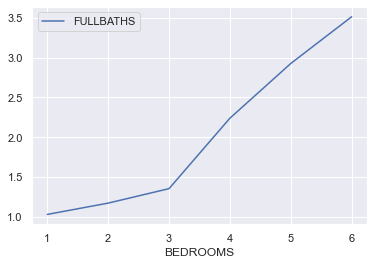

In [66]:

plt.figure()
bb_line = bed_bath.plot(kind='line')
print(bb_line)



**Q5.** Refer to the `res_16` DataFrame. 
- Using the `res_16['BEDROOMS']` Series calculate `.value_counts()` for each value in the series
- Then use `.sort_index()` to order it by the index
- Save the results to a new variable called `beds`




In [67]:

beds = res_16['BEDROOMS'].value_counts().sort_index()
print(beds)



BEDROOMS
1     33
2    294
3    593
4    292
5     54
6     38
Name: count, dtype: int64


**Q6.** Refer to the `beds` variable from above question, also note `beds` is a pandas `series` data object.

- Use the `.plot()` method on `beds` to create a bar plot with `kind` parameter set to `bar` and `title` parameter set to `Residential housing by number of bedrooms`
- Save your line plot into a variable called `beds_bar`




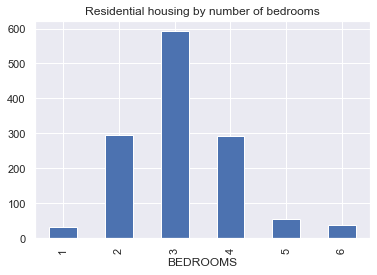

In [68]:

plt.figure()
beds_bar = beds.plot(kind='bar', title='Residential housing by number of bedrooms')



**Q7.** Create a function called `zip_land` which takes two arguments: a DataFrame (with the same columns as `df`) and an integer (which it can be assumed will always be present in the `PROPERTYZIP` column of the DataFrame).

This function will need to filter down the `df` argument to the rows where the `PROPERTYZIP` column is equal to the `zip_code` argument, before returning a `scatter` plot with the following properties:

   - `x`='LOTAREA'
   - `y`='FAIRMARKETLAND'
   - `xlim` and `ylim` both from `0` to double the `.mean()` of the respective column values
   - `alpha`=0.4
   - `figsize`=(12,10)




In [69]:


def zip_land(df, zip_code):
    sub = df[(df['PROPERTYZIP'] == zip_code)]
    zip_chart = sub.plot(x='LOTAREA', 
                         y='FAIRMARKETLAND', 
                         kind='scatter', 
                         xlim=(0, sub['LOTAREA'].mean() * 2), 
                         ylim=(0, sub['FAIRMARKETLAND'].mean() * 2), 
                         alpha=0.4, 
                         figsize=(12, 10));
    
    return zip_chart





Run the following code cell to check that your function returns a chart as expected:

/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Figure size 432x288 with 0 Axes>

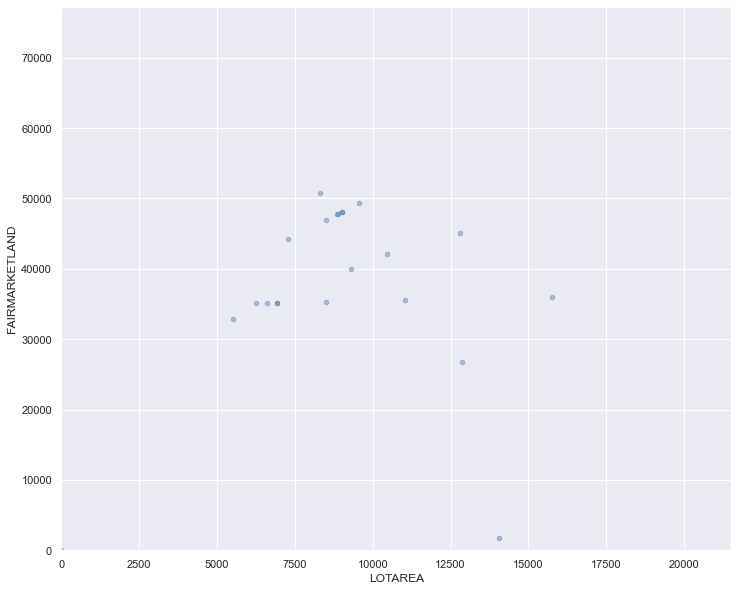

In [70]:
plt.figure()
zip_chart = zip_land(df, 15236)

### Charting Property Values with Seaborn

**Q8.** Refer to the `df` DataFrame. Create a new DataFrame called `sales` which contains only entries from `df` with a `SALEDESC` of `'VALID SALE'`.
- Use the `.copy()` method to ensure you have a distinct DataFrame in memory
- Call the new dataframe `sales`



In [71]:

sales = df[df['SALEDESC'] == 'VALID SALE'].copy()
assert sales['SALEDESC'].eq('VALID SALE').all(), "Your DataFrame still contains values with SALEDESC not equal to VALID SALE."
print(sales)



     PROPERTYADDRESS   PROPERTYCITY  PROPERTYZIP               MUNIDESC  \
21      BIGELOW BLVD     PITTSBURGH        15213  4th Ward - PITTSBURGH   
22      BIGELOW BLVD     PITTSBURGH        15213  4th Ward - PITTSBURGH   
25        FORBES AVE     PITTSBURGH        15213  4th Ward - PITTSBURGH   
28       BOUNDARY ST     PITTSBURGH        15213  4th Ward - PITTSBURGH   
35        S CRAIG ST     PITTSBURGH        15213  4th Ward - PITTSBURGH   
...              ...            ...          ...                    ...   
1642        PARK AVE     PITTSBURGH        15221       Braddock Hills     
1643     BIG ROCK RD   ALLISON PARK        15101              Hampton     
1644     PHILLIPS LN  MC KEES ROCKS        15136             Robinson     
1645       REITER RD     PITTSBURGH        15235           Penn Hills     
1647     HIGHVIEW DR     PITTSBURGH        15241      Upper St. Clair     

              SCHOOLDESC                 NEIGHDESC       TAXDESC  \
21    City Of Pittsburgh       

**Q9.** Add a column to `sales` called `PITTSBURGH`, containing boolean values of `True` where `PROPERTYCITY` equals `PITTSBURGH` and `False` if not.



In [72]:

sales['PITTSBURGH'] = sales['PROPERTYCITY'] == 'PITTSBURGH'



**Q10.** Create a seaborn `.violinplot()` with the following properties:

`x` = `'PITTSBURGH'`  
`y` = `'FAIRMARKETTOTAL'`   
`data` = only entries from `sales` where `sales['BEDROOMS'] == 1]`

Call the new variable `pitts_violin`



/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


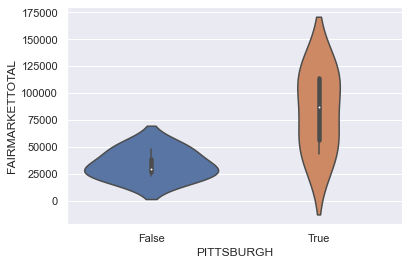

In [73]:

filtered_sales = sales[sales['BEDROOMS'] == 1]

plt.figure()
pitts_violin = sns.violinplot(x='PITTSBURGH', y='FAIRMARKETTOTAL', data=filtered_sales)
plt.show()


**Q11.** Create a seaborn `.regplot()` with the following properties:

`x` = `'SALEPRICE'`    
`y` = `'FAIRMARKETTOTAL'`  
`data` = only entries from `sales` where `sales['GRADEDESC'] == 'EXCELLENT'`

Call the new variable `exc_reg`



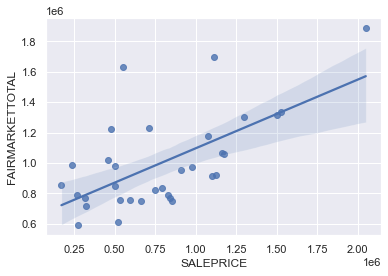

In [74]:

excellent = sales[sales['GRADEDESC'] == 'EXCELLENT']
plt.figure()
exc_reg = sns.regplot(x= 'SALEPRICE' , y ='FAIRMARKETTOTAL', data = excellent)



**Q12.** Create a DataFrame called `bus` which contains only entries from `sales` where `CLASSDESC` `.isin(['COMMERCIAL', 'INDUSTRIAL', 'AGRICULTURAL'])`.



In [75]:

bus = sales[sales['CLASSDESC'].isin(['COMMERCIAL', 'INDUSTRIAL', 'AGRICULTURAL'])]
bus.head()



,PROPERTYADDRESS,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SCHOOLDESC,NEIGHDESC,TAXDESC,OWNERDESC,CLASSDESC,USEDESC,...,CONDITIONDESC,CDUDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE,PITTSBURGH
25,FORBES AVE,PITTSBURGH,15213,4th Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,20 - Taxable,CORPORATION,COMMERCIAL,RETL/OFF OVER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
35,S CRAIG ST,PITTSBURGH,15213,4th Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,20 - Taxable,CORPORATION,COMMERCIAL,SMALL DETACHED RET(UNDER 10000),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
51,PENN AVE,PITTSBURGH,15201,6th Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,20 - Taxable,CORPORATION,COMMERCIAL,SMALL DETACHED RET(UNDER 10000),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
162,HASTINGS ST,PITTSBURGH,15206,14th Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,20 - Taxable,CORPORATION,COMMERCIAL,OFFICE - 1-2 STORIES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
197,E CARSON ST,PITTSBURGH,15203,17th Ward - PITTSBURGH,City Of Pittsburgh,PITTSBURGH URBAN,20 - Taxable,CORPORATION,COMMERCIAL,RETL/APT'S OVER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


**Q13.** Create a DataFrame using the `.groupby()` method on the `bus` DataFrame with the following properties:

- Data grouped by `['CLASSDESC', 'PITTSBURGH']` where the values are of the `.mean()` of `'FAIRMARKETTOTAL'`
- Use `.reset_index()` so that a DataFrame is created
- Use `.sort_values(by='FAIRMARKETTOTAL')` to order it

Call the new dataframe `bus_value`


In [76]:

bus_value = bus.groupby(['CLASSDESC', 'PITTSBURGH'])['FAIRMARKETTOTAL'].mean().reset_index().sort_values(by='FAIRMARKETTOTAL')
bus_value




,CLASSDESC,PITTSBURGH,FAIRMARKETTOTAL
0,COMMERCIAL,False,191475.0
2,INDUSTRIAL,False,362800.0
1,COMMERCIAL,True,674725.0


**Q14.** Create a seaborn `.barplot()` with the following properties:
- `x` = `'CLASSDESC'`
- `y` = `'FAIRMARKETTOTAL'`
- `hue` = `'PITTSBURGH'`
- `data` = `bus_value`

Call the new variable `bus_bar`


/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nikulkerai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

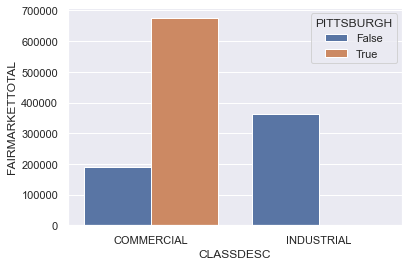

In [77]:


plt.figure()
bus_bar = sns.barplot(x='CLASSDESC', y='FAIRMARKETTOTAL', hue='PITTSBURGH', data=bus_value, dodge=True)
plt.show()



This project focused on practising the pre-processing of data and then using the pandas and seaborn libraries for Python to construct different types of plots to visualise the trends in the data. I was able to successfully complete this project as each question gave me a good test of my syntax writing and I was able to follow line by line each step in order to construct the correct python syntax for each different type of plot. I was able to successfully analyse and compare different types of properties based in the USA and this project helped me to reinforce my understanding of data preprocessing and graph plots which I can carry forward in future data projects.